# HIERARCHIAL  CLUSTERING   

#  EAST WEST AIRLINES DATA SET 

#  Problem statement
  
  
  Airlines has to segregate their flights according to there performance and the life of a flight . The objective of this project is to group similar fights into clusters  and draw insights about each cluster
  
  
  `CRISP-ML(Q)` process model describes six phases:

1. Business and Data Understanding
2. Data Preparation
3. Model Building
4. Model Evaluation
5. Deployment
6. Monitoring and Maintenance

OBJECTIVE :- Maximize the understanding of the flights

CONSTRAINTS  :-  Minimize the braindrain
  
  
  **Success Criteria**

- **Business Success Criteria**: Achieve better understanding of the flights and increse performance of flights 

- **ML Success Criteria**: Achieve Silhoutte coefficient of atleast 0.6

- **Economic Success Criteria**: To increse the revenue at least 20 _30%

**Proposed Plan:**
    

Grouping the available flights will allow to understand the characteristics of each group.


# DATA COLLECTION
 
 DATA :  The data of the EAST WEST AIRLINES has been available publicly
 
 DATA DICTIONARY :
 
 Their are 12 features and 4000 observations in the dataset
 :
 DESCRPTION 
 
    1.ID - Index of the observations
    2.Balance - number of miles eligible for award travel
    3.Qual_miles - number of miles qualifying for TopFlight status
    4.cc1_miles - credit card miles
    5.cc2_miles - credit card miles
    6.cc3_miles - credit card miles
    7.Bonus_miles - number of miles earned from non-flight bonus transactions in the past 12 months
    8.Bonus_trans - number of non-flight bonus transactions in the past 12 months
    9.Flight_miles_12mo - number of flight miles in the past 12 months
    10.Flight_trans_12 - number of flight transactions in the past 12 months
    11.Days_since_enroll - number of days since enrolled
    12.Award - Awards received

In [1]:
### IMPORT REQUIRED LIBRARIES

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

In [3]:
airlines = pd.read_excel(r"C:\Users\amare\Downloads\Dataset_Assignment Clustering_K Means\EastWestAirlines.xlsx","data")
airlines

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [4]:
airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [5]:
airlines.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

# EXPLORATORY DATA ANALYSIS

In [6]:
### 1ST MOMENT BUSINESS DECISION

In [7]:
airlines.mean()

ID#                   2014.819455
Balance              73601.327582
Qual_miles             144.114529
cc1_miles                2.059515
cc2_miles                1.014504
cc3_miles                1.012253
Bonus_miles          17144.846212
Bonus_trans             11.601900
Flight_miles_12mo      460.055764
Flight_trans_12          1.373593
Days_since_enroll     4118.559390
Award?                   0.370343
dtype: float64

In [8]:
airlines.median()

ID#                   2016.0
Balance              43097.0
Qual_miles               0.0
cc1_miles                1.0
cc2_miles                1.0
cc3_miles                1.0
Bonus_miles           7171.0
Bonus_trans             12.0
Flight_miles_12mo        0.0
Flight_trans_12          0.0
Days_since_enroll     4096.0
Award?                   0.0
dtype: float64

In [9]:
### 2nd moment business decision

In [10]:
airlines.var()

ID#                  1.347374e+06
Balance              1.015573e+10
Qual_miles           5.985557e+05
cc1_miles            1.895907e+00
cc2_miles            2.180060e-02
cc3_miles            3.811896e-02
Bonus_miles          5.832692e+08
Bonus_trans          9.223317e+01
Flight_miles_12mo    1.960586e+06
Flight_trans_12      1.438816e+01
Days_since_enroll    4.264781e+06
Award?               2.332473e-01
dtype: float64

In [11]:
airlines.std()

ID#                    1160.764358
Balance              100775.664958
Qual_miles              773.663804
cc1_miles                 1.376919
cc2_miles                 0.147650
cc3_miles                 0.195241
Bonus_miles           24150.967826
Bonus_trans               9.603810
Flight_miles_12mo      1400.209171
Flight_trans_12           3.793172
Days_since_enroll      2065.134540
Award?                    0.482957
dtype: float64

In [12]:
### 3rd moment business decision

In [13]:
airlines.skew()

ID#                  -0.003343
Balance               5.004187
Qual_miles            7.512395
cc1_miles             0.857569
cc2_miles            11.210459
cc3_miles            17.195532
Bonus_miles           2.842093
Bonus_trans           1.157362
Flight_miles_12mo     7.451666
Flight_trans_12       5.490461
Days_since_enroll     0.120174
Award?                0.537200
dtype: float64

In [14]:
### 4th moment business decision

In [15]:
airlines.kurt()

ID#                   -1.199648
Balance               44.157932
Qual_miles            67.689351
cc1_miles             -0.748508
cc2_miles            133.786489
cc3_miles            308.654728
Bonus_miles           13.630489
Bonus_trans            2.745737
Flight_miles_12mo     94.761019
Flight_trans_12       42.978152
Days_since_enroll     -0.967505
Award?                -1.712272
dtype: float64

In [16]:
airlines.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


# AUTO EDA

In [17]:
import dtale
d = dtale.show(airlines)
d.open_browser()

# PREPROCESSING

In [18]:
### TYPECASTING

In [19]:
airlines.dtypes

ID#                  int64
Balance              int64
Qual_miles           int64
cc1_miles            int64
cc2_miles            int64
cc3_miles            int64
Bonus_miles          int64
Bonus_trans          int64
Flight_miles_12mo    int64
Flight_trans_12      int64
Days_since_enroll    int64
Award?               int64
dtype: object

In [20]:
### DUPLICATION
duplicate = airlines.duplicated()
print(duplicate)
sum(duplicate)

0       False
1       False
2       False
3       False
4       False
        ...  
3994    False
3995    False
3996    False
3997    False
3998    False
Length: 3999, dtype: bool


0

In [21]:
duplicated = airlines.duplicated(keep = 'last')

In [22]:
### IMPUTATION
airlines.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [23]:
### ZERO VARIANCE FEATURES

In [24]:
airlines.var()


ID#                  1.347374e+06
Balance              1.015573e+10
Qual_miles           5.985557e+05
cc1_miles            1.895907e+00
cc2_miles            2.180060e-02
cc3_miles            3.811896e-02
Bonus_miles          5.832692e+08
Bonus_trans          9.223317e+01
Flight_miles_12mo    1.960586e+06
Flight_trans_12      1.438816e+01
Days_since_enroll    4.264781e+06
Award?               2.332473e-01
dtype: float64

In [25]:
airlines.var() == 0

ID#                  False
Balance              False
Qual_miles           False
cc1_miles            False
cc2_miles            False
cc3_miles            False
Bonus_miles          False
Bonus_trans          False
Flight_miles_12mo    False
Flight_trans_12      False
Days_since_enroll    False
Award?               False
dtype: bool

In [26]:
### OUTLIERS TREATMENT

ID#                     AxesSubplot(0.125,0.11;0.0545775x0.77)
Balance              AxesSubplot(0.190493,0.11;0.0545775x0.77)
Qual_miles           AxesSubplot(0.255986,0.11;0.0545775x0.77)
cc1_miles            AxesSubplot(0.321479,0.11;0.0545775x0.77)
cc2_miles            AxesSubplot(0.386972,0.11;0.0545775x0.77)
cc3_miles            AxesSubplot(0.452465,0.11;0.0545775x0.77)
Bonus_miles          AxesSubplot(0.517958,0.11;0.0545775x0.77)
Bonus_trans          AxesSubplot(0.583451,0.11;0.0545775x0.77)
Flight_miles_12mo    AxesSubplot(0.648944,0.11;0.0545775x0.77)
Flight_trans_12      AxesSubplot(0.714437,0.11;0.0545775x0.77)
Days_since_enroll     AxesSubplot(0.77993,0.11;0.0545775x0.77)
Award?               AxesSubplot(0.845423,0.11;0.0545775x0.77)
dtype: object

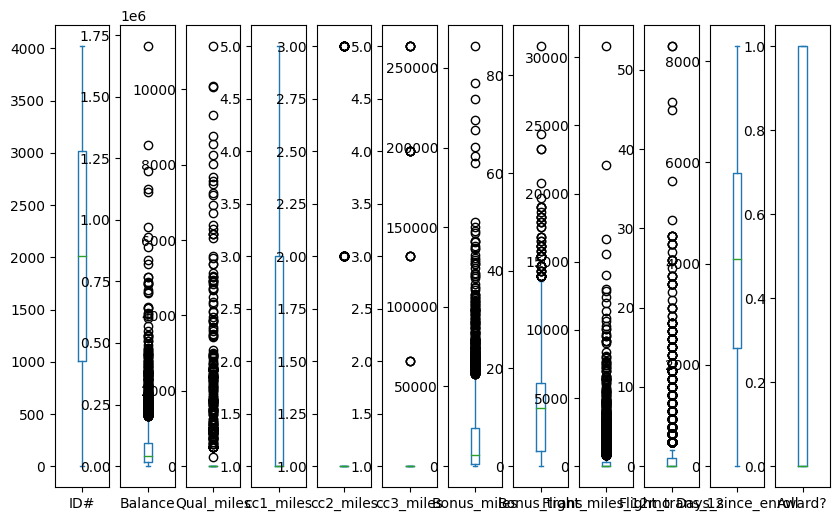

In [27]:
airlines.plot(kind = 'box', subplots = True, sharey = False, figsize = (10, 6))

In [28]:
###WINSORIZE THE COLUMNS THAT HAS OUTLIERS 


In [29]:
airlines.columns

Index(['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

In [30]:
from feature_engine.outliers import Winsorizer
from scipy.stats.mstats import winsorize

In [31]:

winsor = Winsorizer(capping_method = 'iqr',  tail = 'both',  
                                            fold = 1.5,
                                   variables = ['Balance'])

airlines['Balance'] = winsor.fit_transform(airlines[['Balance']])


In [32]:
airlines['Qual_miles']=winsorize(airlines.Qual_miles,limits=[0.06, 0.094])   

In [33]:
airlines['cc2_miles']=winsorize(airlines.cc2_miles,limits=[0.02, 0.098])   

In [34]:
airlines['cc3_miles']=winsorize(airlines.cc3_miles,limits=[0.01, 0.099])   

In [35]:

winsor = Winsorizer(capping_method = 'gaussian',  tail = 'both',  
                                            fold = 1.5,
                                   variables = ['Bonus_miles'])

airlines['Bonus_miles'] = winsor.fit_transform(airlines[['Bonus_miles']])

In [36]:

winsor = Winsorizer(capping_method = 'iqr',  tail = 'both',  
                                            fold = 1.5,
                                   variables = ['Bonus_trans'])

airlines['Bonus_trans'] = winsor.fit_transform(airlines[['Bonus_trans']])

In [37]:

winsor = Winsorizer(capping_method = 'iqr',  tail = 'both',  
                                            fold = 1.5,
                                   variables = ['Flight_miles_12mo'])

airlines['Flight_miles_12mo'] = winsor.fit_transform(airlines[['Flight_miles_12mo']])

In [38]:

winsor = Winsorizer(capping_method = 'iqr',  tail = 'both',  
                                            fold = 1.5,
                                   variables = ['Flight_trans_12'])

airlines['Flight_trans_12'] = winsor.fit_transform(airlines[['Flight_trans_12']])

ID#                     AxesSubplot(0.125,0.11;0.0545775x0.77)
Balance              AxesSubplot(0.190493,0.11;0.0545775x0.77)
Qual_miles           AxesSubplot(0.255986,0.11;0.0545775x0.77)
cc1_miles            AxesSubplot(0.321479,0.11;0.0545775x0.77)
cc2_miles            AxesSubplot(0.386972,0.11;0.0545775x0.77)
cc3_miles            AxesSubplot(0.452465,0.11;0.0545775x0.77)
Bonus_miles          AxesSubplot(0.517958,0.11;0.0545775x0.77)
Bonus_trans          AxesSubplot(0.583451,0.11;0.0545775x0.77)
Flight_miles_12mo    AxesSubplot(0.648944,0.11;0.0545775x0.77)
Flight_trans_12      AxesSubplot(0.714437,0.11;0.0545775x0.77)
Days_since_enroll     AxesSubplot(0.77993,0.11;0.0545775x0.77)
Award?               AxesSubplot(0.845423,0.11;0.0545775x0.77)
dtype: object

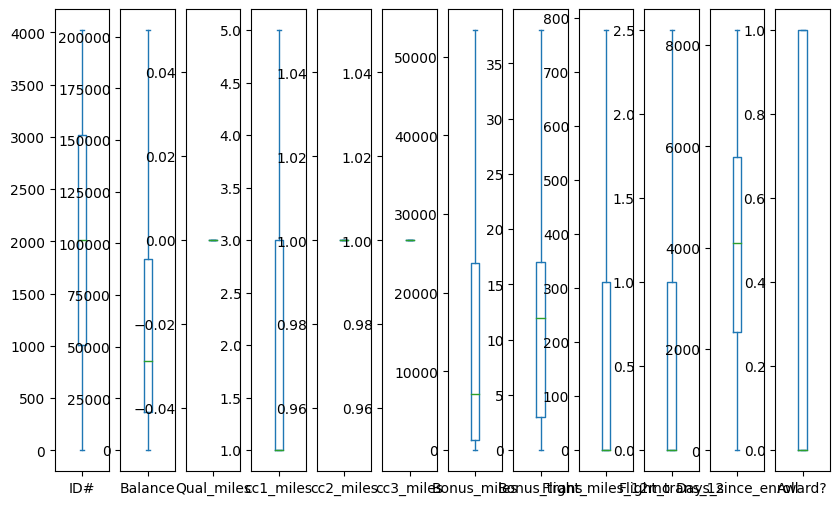

In [39]:
airlines.plot(kind = 'box', subplots = True, sharey = False, figsize = (10, 6))

In [40]:
### GRAPHICAL  REPRESENTATION

In [41]:
%matplotlib inline

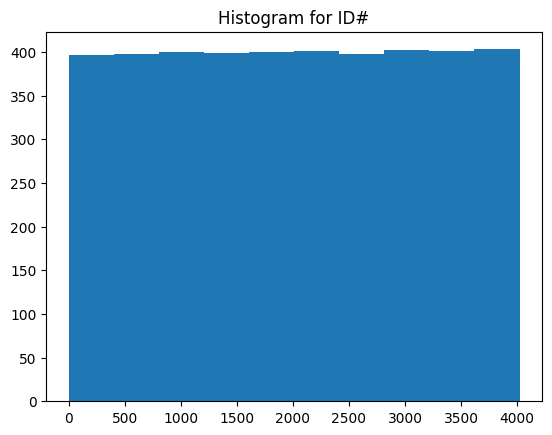

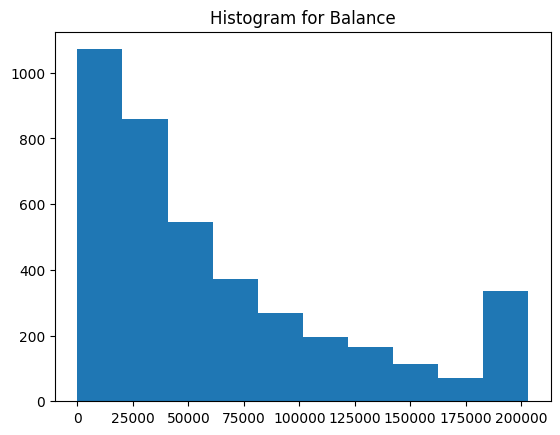

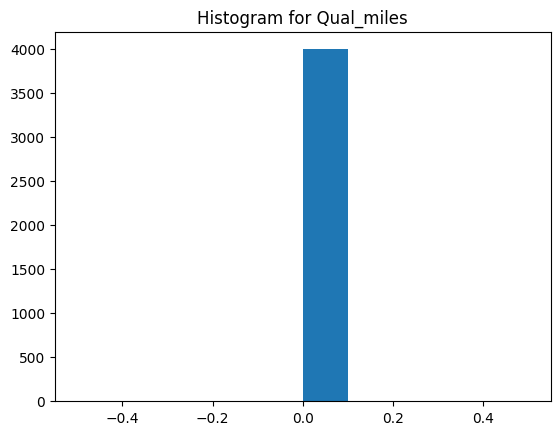

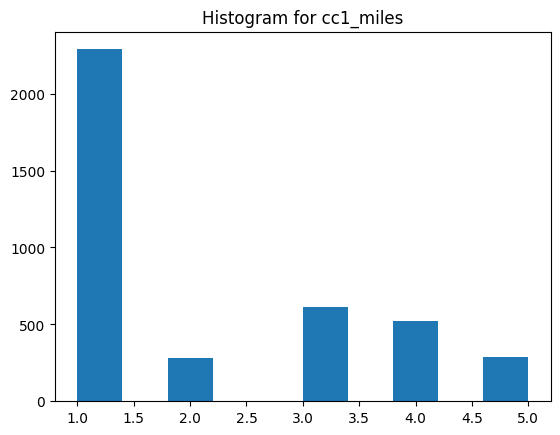

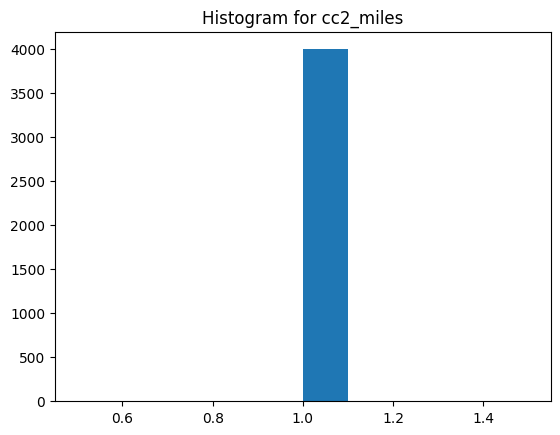

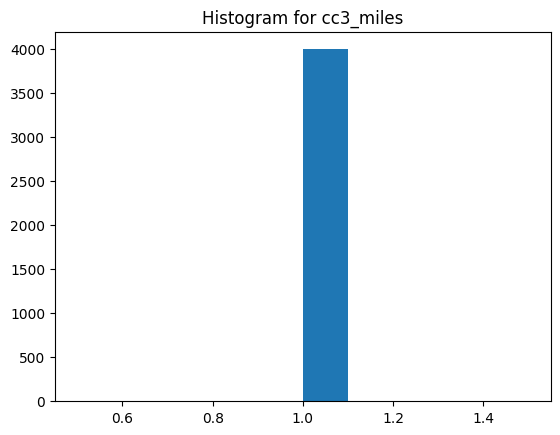

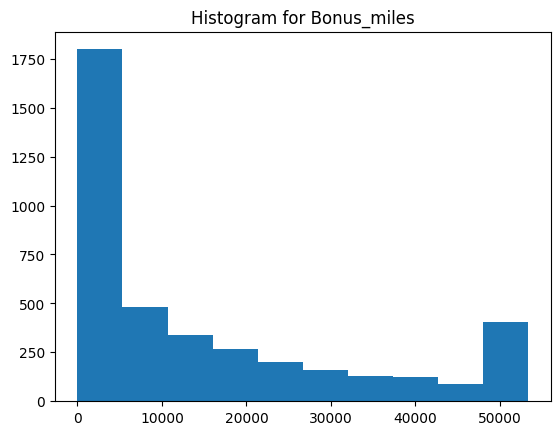

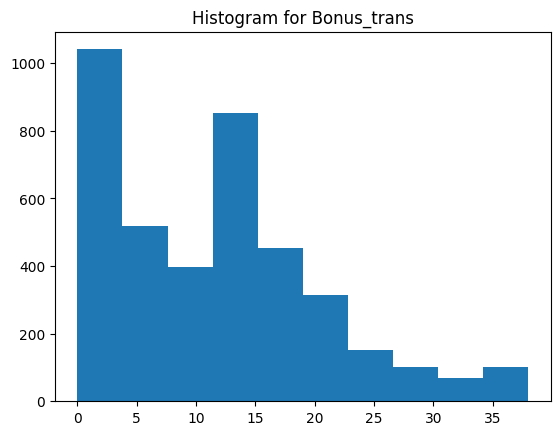

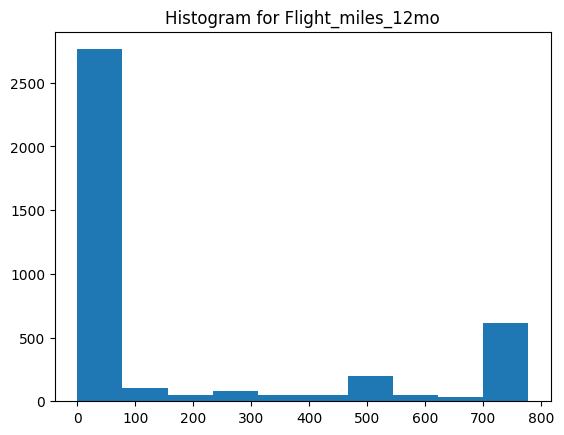

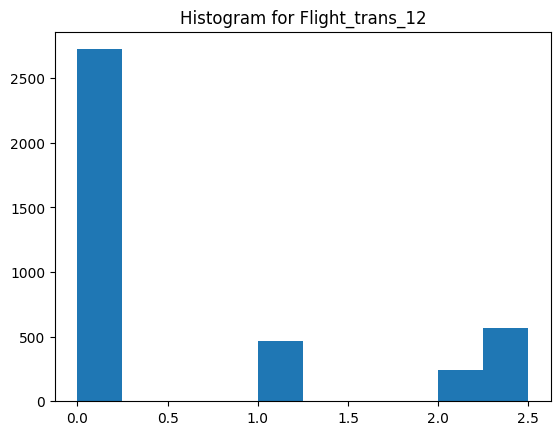

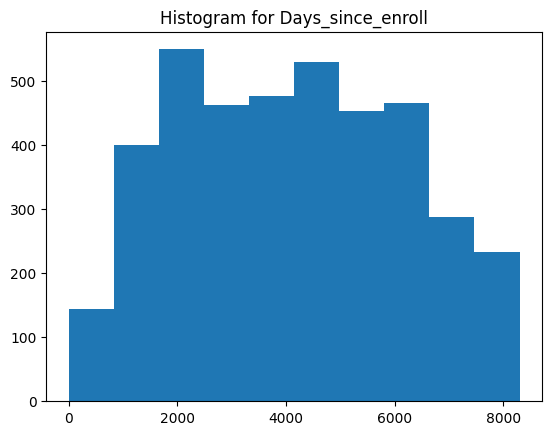

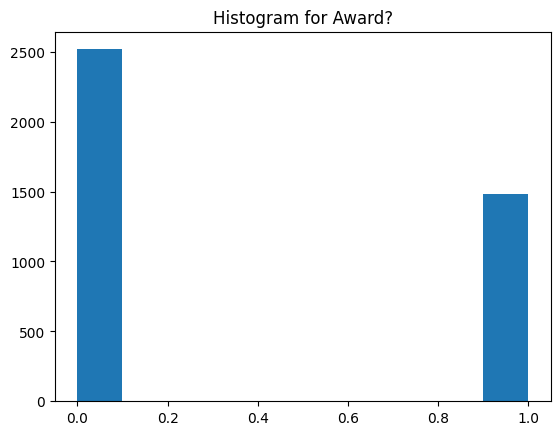

In [42]:

for i in airlines.columns:
  plt.hist(x = airlines[i])
  plt.title("Histogram for " + str(i))
  plt.show()

In [43]:
import scipy.stats as stats
import pylab

C:\Users\amare\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning:

divide by zero encountered in log

C:\Users\amare\anaconda3\lib\site-packages\numpy\lib\function_base.py:2536: RuntimeWarning:

invalid value encountered in subtract



((array([-3.57770057, -3.33880912, -3.20695861, ...,  3.20695861,
          3.33880912,  3.57770057]),
  array([       -inf,  3.91202301,  4.21950771, ..., 12.22203826,
         12.22203826, 12.22203826])),
 (nan, nan, nan))

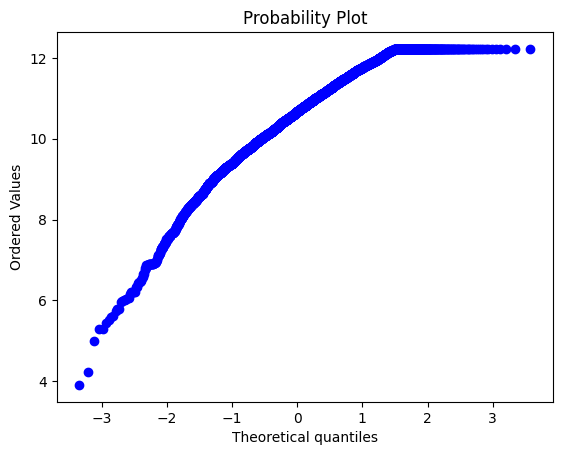

In [44]:
stats.probplot(np.log(airlines.Balance), dist = "norm", plot = pylab)

((array([-3.57770057, -3.33880912, -3.20695861, ...,  3.20695861,
          3.33880912,  3.57770057]),
  array([0.69314718, 2.07944154, 2.30258509, ..., 9.02352875, 9.02352875,
         9.02352875])),
 (0.6672878082866374, 8.138517782652487, 0.9217625992666829))

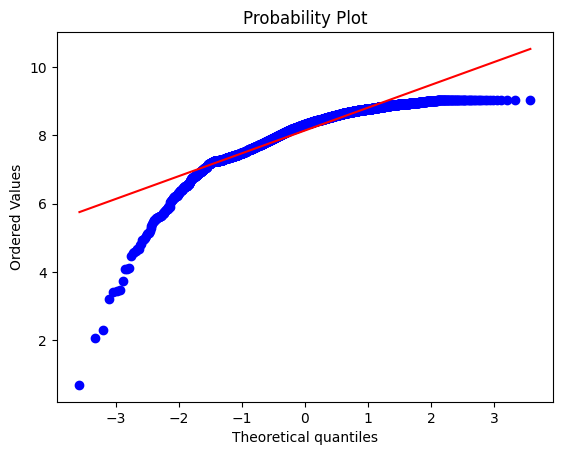

In [45]:
stats.probplot(np.log(airlines.Days_since_enroll), dist = "norm", plot = pylab)

In [46]:
### SCATTER PLOT

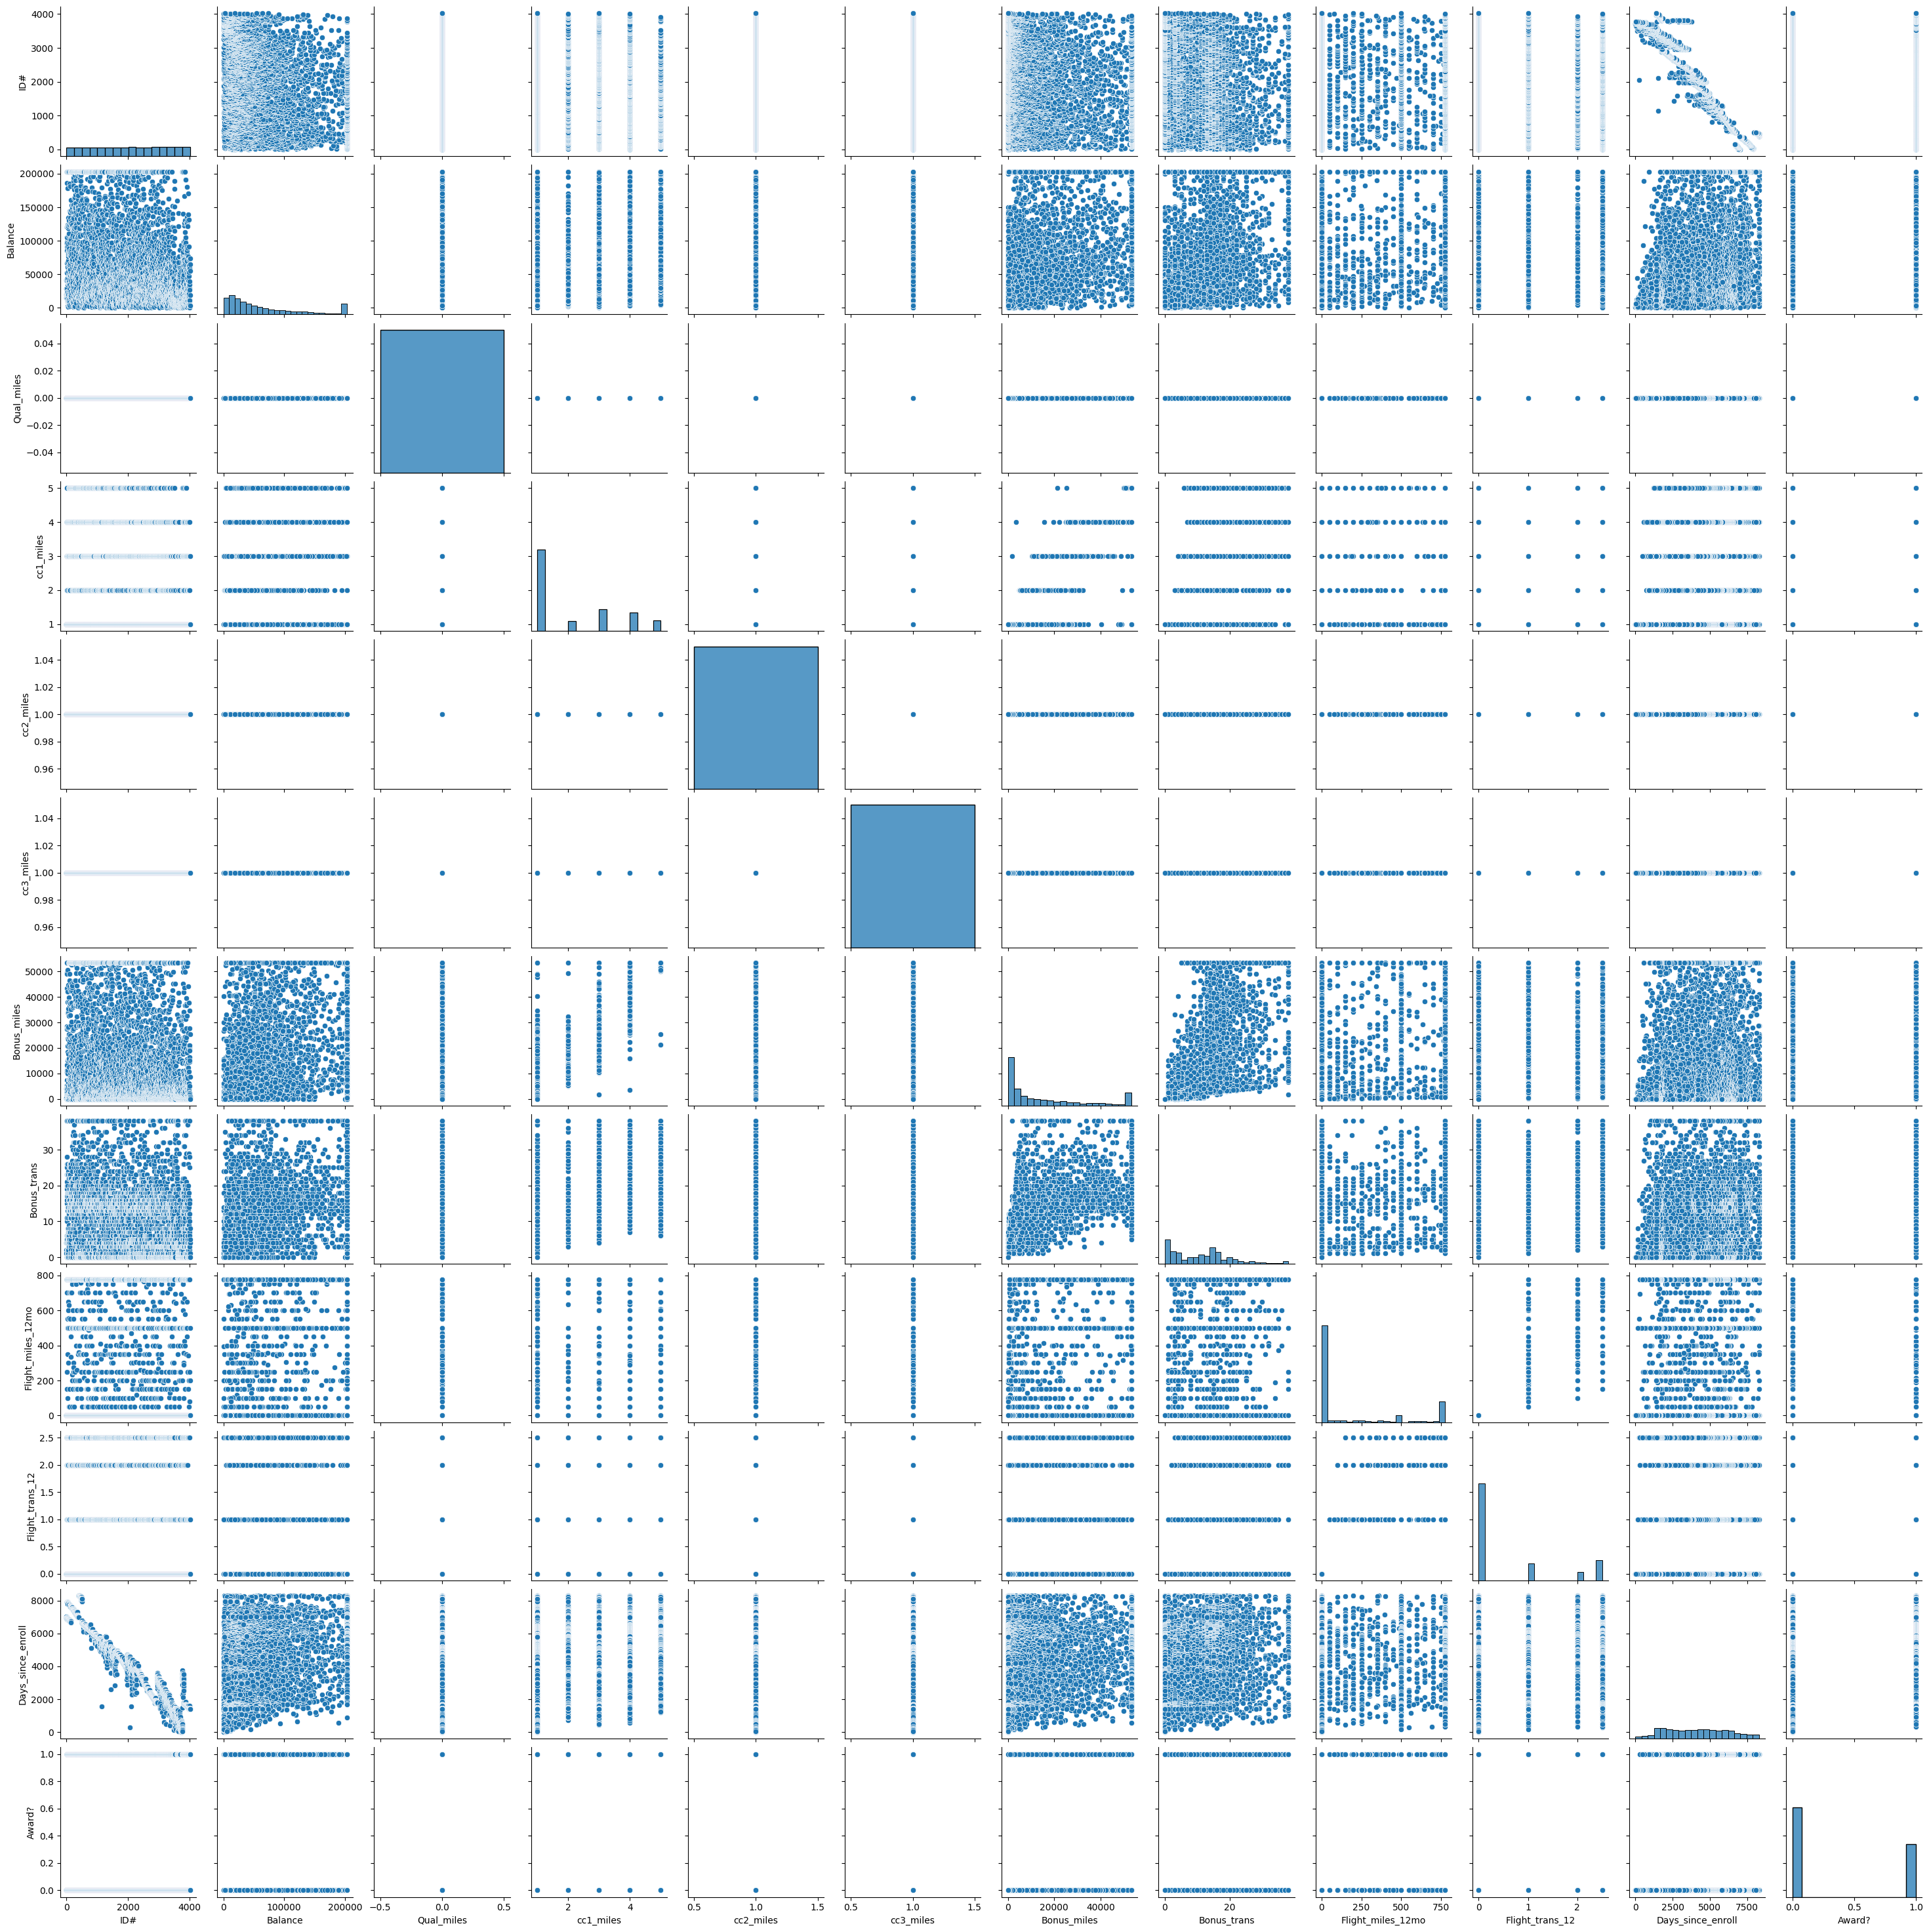

In [47]:
sns.pairplot(airlines)

In [48]:
### NORMALIZATION

In [49]:
def norm_func(i):
  x = (i-i.min()) / (i.max()-i.min())
  return(x)

In [50]:
airlines_norm = norm_func(airlines.iloc[: , 1:])

In [51]:
airlines_norm.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.138486,NaN,0.00,NaN,NaN,0.003260,0.026316,0.0,0.0,0.843742,0.0
1,0.094696,NaN,0.00,NaN,NaN,0.004029,0.052632,0.0,0.0,0.839884,0.0
2,0.203495,NaN,0.00,NaN,NaN,0.077258,0.105263,0.0,0.0,0.847842,0.0
3,0.072710,NaN,0.00,NaN,NaN,0.009369,0.026316,0.0,0.0,0.837955,0.0
4,0.481019,NaN,0.75,NaN,NaN,0.811366,0.684211,1.0,1.0,0.835905,1.0


In [52]:
airlines_norm.drop(['Qual_miles' ,'cc2_miles','cc3_miles'],axis = 1 ,inplace = True)

# CLUSTERING MODEL BUILDING

# HIERARCHIAL CLUSTERING

In [53]:
from scipy.cluster.hierarchy import linkage , dendrogram
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

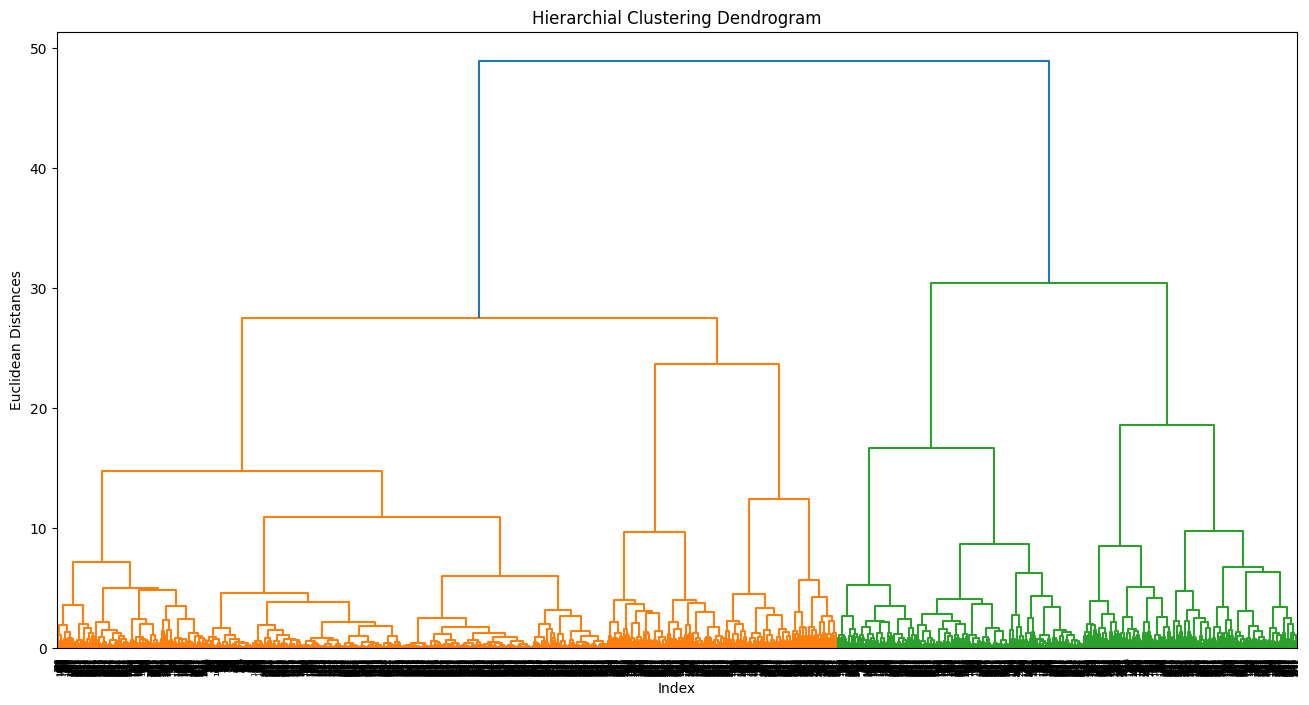

In [54]:
plt.figure(1 , figsize =(16,8))
tree_plot = dendrogram(linkage(airlines_norm, method = "ward"))
plt.title('Hierarchial Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Euclidean Distances')
plt.show()

In [55]:
### APPLYING AGGLOMERATIVE CLUSTERING CHOSING 3 CLUSTERS

In [56]:
hc1 = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'average')

crime_hc_average = hc1.fit_predict(airlines_norm)
crime_hc_average

array([0, 0, 0, ..., 2, 0, 0], dtype=int64)

In [57]:
hc2 = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'complete')

crime_hc_complete = hc2.fit_predict(airlines_norm)
crime_hc_complete

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [58]:
hc3 = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'single')

crime_hc_single= hc3.fit_predict(airlines_norm)
crime_hc_single

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [59]:
### LOOKING AT THE RESULTS COMPLETE AND AVERAGE HAS ALMOST SAME CLUSTERS 

In [60]:
hc1.labels_

array([0, 0, 0, ..., 2, 0, 0], dtype=int64)

In [61]:
cluster_labels = pd.Series(hc1.labels_)

In [62]:
airlines['cluster'] = cluster_labels

In [63]:
airlines.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
0,1,28143.0,0,1,1,1,174.0,1.0,0.0,0.0,7000,0,0
1,2,19244.0,0,1,1,1,215.0,2.0,0.0,0.0,6968,0,0
2,3,41354.0,0,1,1,1,4123.0,4.0,0.0,0.0,7034,0,0
3,4,14776.0,0,1,1,1,500.0,1.0,0.0,0.0,6952,0,0
4,5,97752.0,0,4,1,1,43300.0,26.0,777.5,2.5,6935,1,1


In [64]:
### CLUSTER EVALUATION

In [65]:
airlines2 = airlines.sort_values(by = 'cluster' , ascending = True)
airlines2

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
0,1,28143.0,0,1,1,1,174.0,1.0,0.0,0.0,7000,0,0
2494,2513,142152.0,0,3,1,1,19464.0,13.0,0.0,0.0,3088,0,0
2495,2514,12713.0,0,1,1,1,0.0,0.0,0.0,0.0,3077,0,0
2496,2515,28848.0,0,1,1,1,0.0,0.0,0.0,0.0,3069,0,0
2497,2516,10940.0,0,1,1,1,0.0,0.0,0.0,0.0,3062,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2689,2709,60085.0,0,3,1,1,14714.0,17.0,0.0,0.0,2404,1,2
2684,2704,103215.0,0,3,1,1,16726.0,14.0,0.0,0.0,2427,1,2
2683,2703,9520.0,0,3,1,1,12515.0,13.0,0.0,0.0,2438,1,2
2707,2729,62124.0,0,1,1,1,0.0,0.0,0.0,0.0,2355,1,2


In [1]:
from sklearn import metrics

In [67]:
metrics.silhouette_score(airlines ,cluster_labels)

0.024954370578876384

# 
   1. Cluster0 = Defines the group of fliers that earn the most out of the card and are frequent fliers
   2. Cluster2 = Defines the group of fliers that earn but and are the second most frequent fliers
   3. Cluster1  = Defines the group of fliers that earn the even less and are the third most frequent fliers